# Intensity and beamwidth

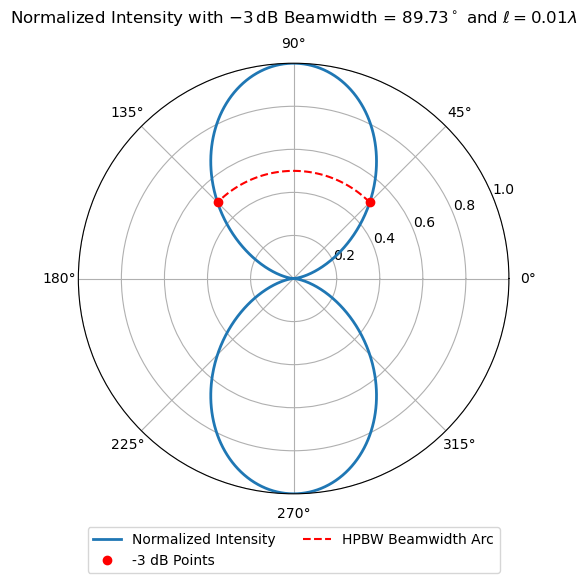

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
I0 = 1
k = 2 * np.pi  # Wavenumber
r = 1
lambda_ = 1 #for simplicity
l = lambda_ /100   
theta = np.linspace(0, 2 * np.pi, 1000)

# Intensity Calculation
term1 = np.cos(np.cos(theta) * (k * l / 2))
term2 = np.cos(k * l / 2)
with np.errstate(divide='ignore', invalid='ignore'):
    intensity = (1 / np.sin(theta)**2) * (term1 - term2)**2
    intensity = np.nan_to_num(intensity)

# Normalize
intensity /= np.max(intensity)

# Find -3 dB beamwidth (half-power points, i.e., intensity >= 0.5)
threshold = 0.5
above_threshold = np.where(intensity >= threshold)[0]

# Find continuous region around main lobe
diffs = np.diff(above_threshold)
splits = np.where(diffs > 1)[0]

if len(splits) == 0:
    beam_idx = above_threshold
else:
    blocks = np.split(above_threshold, splits + 1)
    beam_idx = max(blocks, key=len)

theta_beam = theta[beam_idx]
beamwidth_deg = np.degrees(theta_beam[-1] - theta_beam[0])

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, intensity, label='Normalized Intensity', linewidth=2)

# Highlight -3 dB points
ax.plot([theta_beam[0], theta_beam[-1]], [0.5, 0.5], 'ro', label='-3 dB Points')
ax.plot(np.linspace(theta_beam[0], theta_beam[-1], 100), 
        [0.5]*100, 'r--', label='HPBW Beamwidth Arc')

# Title and formatting
ax.set_title(rf'Normalized Intensity with $-3\,$dB Beamwidth = {beamwidth_deg:.2f}$^\circ$ and $\ell = {l:.2f}\lambda$', va='bottom')
ax.set_rmax(1)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()


filename = f'C:\\Users\\mattc\\OneDrive\\Documents\\Jupiter_polar_plot\\beamwidth_lambda_{l:.2f}.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

plt.show()